# CUSTOMHyS for Designing Microchannel Heat Sinks

## 0. Packages' installation and loading

In [1]:
%pwd

'/Users/jcrvz/PycharmProjects/Microchannels'

Instalamos el paquete de Customhys directo del repositorio

In [2]:
!pip3 install install customhys==1.0.1.dev1

You should consider upgrading via the '/Users/jcrvz/.pyenv/versions/3.8.13/bin/python3.8 -m pip install --upgrade pip' command.


Cargamos los paquetes que vamos a utilizar

In [11]:
import numpy as np
from microchannels import Microchannel
from materials import Copper, Air
from customhys import metaheuristic as mh

## 1. Microchannel Heat Sink model preparation
En esta parte, preparamos el modelo para utilizarlo y evaluar una configuración de parámetros de diseño en la función objetivo, que en este caso será al generación de entropía.

In [73]:
class MicrochannelDesign():
    def __init__(self):
        self.model = Microchannel(base=Copper(), coolant=Air())
        self.max_search_range = np.array([self.model.W_d/10, self.model.W_d/10, 0.005])
        self.min_search_range = np.array([1e-24, 1e-12, 1e-8])
        self.func_name = 'Microchannel entropy generation model'

    def get_func_val(self, variables):
        self.model.w_w = variables[0]
        self.model.w_c = variables[1]
        self.model.G_d = variables[2]
        return self.model.sgen

    def get_formatted_problem(self, is_constrained=True):
        return dict(function=self.get_func_val,
                    boundaries=(self.min_search_range, self.max_search_range),
                    is_constrained=is_constrained)

fun = MicrochannelDesign()

## 2. Metaheuristic preparation

In [81]:
# Primero cargamos la colección de operadores
with open('./source/collections/' + 'default.txt', 'r') as operators_file:
    heuristic_space = [eval(line.rstrip('\n')) for line in operators_file]

Esta es la parte en donde, utilizando los operadores, ensamblamos la metaheurística a usar:

In [ ]:
# Metaheuristic 1: Random Search
# heur = [('random_search', {'scale': 0.01, 'distribution': 'uniform'}, 'greedy')]

# Metaheuristic 2: Particle Swarm & Genetic Linear Crossover with Random Pairing and Metropolis Selection
heur = [('swarm_dynamic', {'factor': 0.7, 'self_conf': 2.54, 'swarm_conf': 2.56, 'version': 'inertial', 'distribution': 'uniform'}, 'all'),
        ('genetic_crossover', {'pairing': 'random', 'crossover': 'linear_0.5_0.5', 'mating_pool_factor': 0.4}, 'metropolis')]

Aquí terminamos de definirla empleando CUSTMHyS


In [ ]:
met = mh.Metaheuristic(fun.get_formatted_problem(is_constrained=True), heur , num_iterations=100)

## 3. Run designing process

In [82]:
# Aquí corremos la metaheurística seleccionada
met.verbose = True  # Se puede comentar para que no muestre todo el log
met.run()


Search operators to employ:
swarm_dynamic(factor=0.7,self_conf=2.54,swarm_conf=2.56,version='inertial',distribution='uniform') with all
genetic_crossover(pairing='random',crossover='linear_0.5_0.5',mating_pool_factor=0.4) with metropolis
--------------------------------------------------
1
pop. radius: 1.3428176449281832
x_best = [0.00023072 0.00116055 0.00197101], f_best = 0.10459404963626888
2
pop. radius: 2.0004254131252757
x_best = [0.00023072 0.00116055 0.00197101], f_best = 0.10459404963626888
3
pop. radius: 1.7903762222747552
x_best = [1.76910602e-05 8.36258803e-04 1.86187462e-03], f_best = 0.10280474445164438
4
pop. radius: 1.5408121796631844
x_best = [1.76910602e-05 8.36258803e-04 1.86187462e-03], f_best = 0.10280474445164438
5
pop. radius: 1.9688665483078684
x_best = [1.76910602e-05 8.36258803e-04 1.86187462e-03], f_best = 0.10280474445164438
6
pop. radius: 1.4358678973720207
x_best = [0.00010343 0.00081301 0.00216853], f_best = 0.10087573833183161
7
pop. radius: 1.251828821

/Users/jcrvz/PycharmProjects/Microchannels/source/microchannels.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  mHc = np.sqrt(2.0 * (2.0 * self.w_w + self.L_d) * self.h_avg / (
/Users/jcrvz/PycharmProjects/Microchannels/source/microchannels.py:57: RuntimeWarning: divide by zero encountered in double_scalars
  return self.w_c / self.w_w
/Users/jcrvz/PycharmProjects/Microchannels/source/microchannels.py:152: RuntimeWarning: invalid value encountered in double_scalars
  k_ce = 1.79 - 2.32 * (self.beta / (1 + self.beta)) + \
/Users/jcrvz/PycharmProjects/Microchannels/source/microchannels.py:153: RuntimeWarning: invalid value encountered in double_scalars
  0.53 * (self.beta / (1 + self.beta)) ** 2


37
pop. radius: 0.555790915945754
x_best = [1.88822654e-05 3.59480977e-04 2.07853734e-03], f_best = 0.09858956629330638
38
pop. radius: 0.5831233651354993
x_best = [1.88822654e-05 3.59480977e-04 2.07853734e-03], f_best = 0.09858956629330638
39
pop. radius: 0.41957088570221107
x_best = [1.88822654e-05 3.59480977e-04 2.07853734e-03], f_best = 0.09858956629330638
40
pop. radius: 0.392566369019693
x_best = [1.88822654e-05 3.59480977e-04 2.07853734e-03], f_best = 0.09858956629330638
41
pop. radius: 0.4858630291815411
x_best = [1.88822654e-05 3.59480977e-04 2.07853734e-03], f_best = 0.09858956629330638
42
pop. radius: 0.3457979814565092
x_best = [1.88822654e-05 3.59480977e-04 2.07853734e-03], f_best = 0.09858956629330638
43
pop. radius: 0.4132257767045401
x_best = [1.88822654e-05 3.59480977e-04 2.07853734e-03], f_best = 0.09858956629330638
44
pop. radius: 0.47916850434904956
x_best = [1.88822654e-05 3.59480977e-04 2.07853734e-03], f_best = 0.09858956629330638
45
pop. radius: 0.33632693154802

## 4. Results' visualization

En esta primera gráfica, solo veremos la evolución de la función objetivo (generación de entropía)

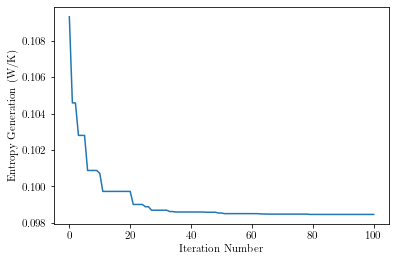

In [83]:
import matplotlib.pyplot as plt

plt.plot(met.historical["fitness"])
plt.ylabel(r'Entropy Generation (W/K)')
plt.xlabel(r'Iteration Number')
plt.show()

In [10]:
# from source import experiment as ex
# expe = ex.Experiment()
# expe.hh_config
# expe.exp_config
# expe.prob_config
# expe.run()